## step 1: import pyspark and initialize spark

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setMaster('local[*]').setAppName('assignment_1')
assi_1 = SparkContext.getOrCreate(conf)


## step 2: Create Resilient Distributed Datasets (RDDs)

In [2]:
file_1 = assi_1.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')
file_2 = assi_1.textFile('Scrum Handbook.txt')
file_1_count = file_1.count()#count the number of lines
file_2_count = file_2.count()#count the number of lines
print('the total number of line of file_1: '+str(file_1_count))
print('the total number of line of file_2: ' + str(file_2_count))
#read the text
print(file_1.take(5))
print(file_2.take(5))

the total number of line of file_1: 21569
the total number of line of file_2: 4617
['LNBIP251 ', '', '', 'I Helen Sharp ', '']
["Jeff Sutherland's ", '', 'Scrum Handbook ', '', '']


## step 3: Cleaning/Manipulating text

In [3]:
import re
#remove all characters which are not alphabets expect spaces
file_1_cleaning = file_1.map(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
file_2_cleaning = file_2.map(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
#change all upper case letter to lower case
file_1_change = file_1_cleaning.map(lambda x: x.lower())
file_2_change = file_2_cleaning.map(lambda x: x.lower())
#remove leading spaece 
file_1_remove_head = file_1_change.map(lambda x: re.sub('^\s*', '', x))
file_2_remove_head = file_2_change.map(lambda x: re.sub('^\s*', '', x))
#remove trailing spaces
file_1_remove_tail = file_1_remove_head.map(lambda x: re.sub('\s*$', '', x))
file_2_remove_tail = file_2_remove_head.map(lambda x: re.sub('\s*$', '', x))
print(file_1_remove_tail.take(5))
print(file_2_remove_tail.take(5))

['lnbip', '', '', 'i helen sharp', '']
['jeff sutherland s', '', 'scrum handbook', '', '']


## step 4: Transforming the Data/Counting the words

In [4]:
#spilt each words by space
file_1_spilt = file_1_remove_tail.flatMap(lambda x: x.split())
#change the format into (word, 1), and add the 1 according to the key. 
file_1_count = file_1_spilt.map(lambda x: (x,1)).reduceByKey(lambda x, y: x+y).sortBy(lambda x:x[1], False)
print(file_1_count.take(20))
file_2_spilt = file_2_remove_tail.flatMap(lambda x: x.split())
file_2_count = file_2_spilt.map(lambda x: (x,1)).reduceByKey(lambda x, y: x+y).sortBy(lambda x:x[1], False)
print(file_2_count.take(20))

[('the', 8161), ('and', 3975), ('of', 3954), ('to', 3751), ('in', 3101), ('a', 2755), ('is', 1541), ('that', 1356), ('for', 1195), ('on', 1027), ('as', 1023), ('we', 980), ('with', 970), ('software', 931), ('this', 915), ('are', 785), ('agile', 784), ('it', 775), ('development', 748), ('was', 711)]
[('the', 1238), ('of', 538), ('and', 534), ('to', 478), ('a', 454), ('scrum', 399), ('in', 363), ('is', 348), ('team', 273), ('product', 233), ('for', 195), ('that', 182), ('it', 172), ('on', 149), ('sprint', 147), ('this', 142), ('with', 132), ('as', 124), ('at', 119), ('are', 119)]


## step 5: Removing Stop Words

In [5]:
from nltk.corpus import stopwords
import nltk

stop_words = stopwords.words("english")

In [6]:
#the word is stopword, the lambda function will return False, and filter will remove the word.
file_1_uniqueword = file_1_count.filter(lambda x: x[0] not in stop_words)
uniqueword_1 = file_1_uniqueword.count()
print('the unique word of file 1 is: ' + str(uniqueword_1))
file_2_uniqueword = file_2_count.filter(lambda x: x[0] not in stop_words)
uniqueword_2 = file_2_uniqueword.count()
print('the unique word of file 2 is: '+str(uniqueword_2))

the unique word of file 1 is: 8962
the unique word of file 2 is: 2857


## step 6: 

In [7]:
#count the number of the total word of file 1.
file_1_word_number = file_1_count.map(lambda x: x[1]).sum()
print(file_1_word_number)
#calculate the average occurrence of a word
file_1_occurance = file_1_uniqueword.mapValues(lambda x: file_1_word_number//x)
print(file_1_occurance.take(5))
#count the number of the total word of file 2
file_2_word_number = file_2_count.map(lambda x: x[1]).sum()
print(file_2_word_number)
#calculate the average occurrence of a word
file_2_occurance = file_2_uniqueword.mapValues(lambda x: file_2_word_number//x)
print(file_2_occurance.take(5))

135625
[('software', 145), ('agile', 172), ('development', 181), ('team', 229), ('work', 294)]
18867
[('scrum', 47), ('team', 69), ('product', 80), ('sprint', 128), ('development', 192)]


## step 7:

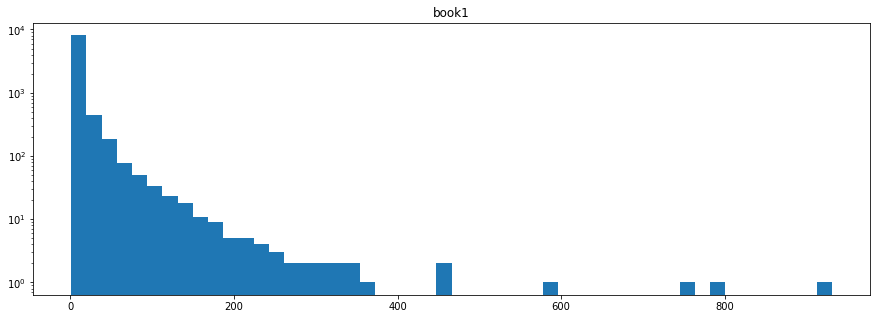

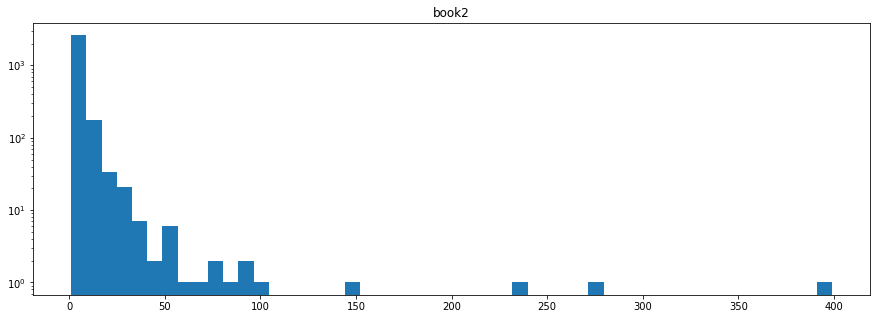

In [8]:
#!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,5))
#plot the hist.
plt.hist(file_1_uniqueword.map(lambda x: x[1]).collect(),bins=50, log=True)
plt.title('book1')
plt.show()
plt.figure(figsize = (15,5))
plt.hist(file_2_uniqueword.map(lambda x: x[1]).collect(),bins=50, log=True)
plt.title('book2')
plt.show()


This chart indicate the total number of words are included in the interval of each word occurence(the interval is 50 words)
the x-axis is the number of vocabulary occurrences, the y-axis indicates how many vocabulary occurances are in this interval. the word number of book 1 is larger than the word number of book 2. The trend of book 1 and book 2 is the same, the vocabulary with less use is more than the vocabulary with more usage, and the downward trend is from eager to slow. Most vocabulary is not used very often.

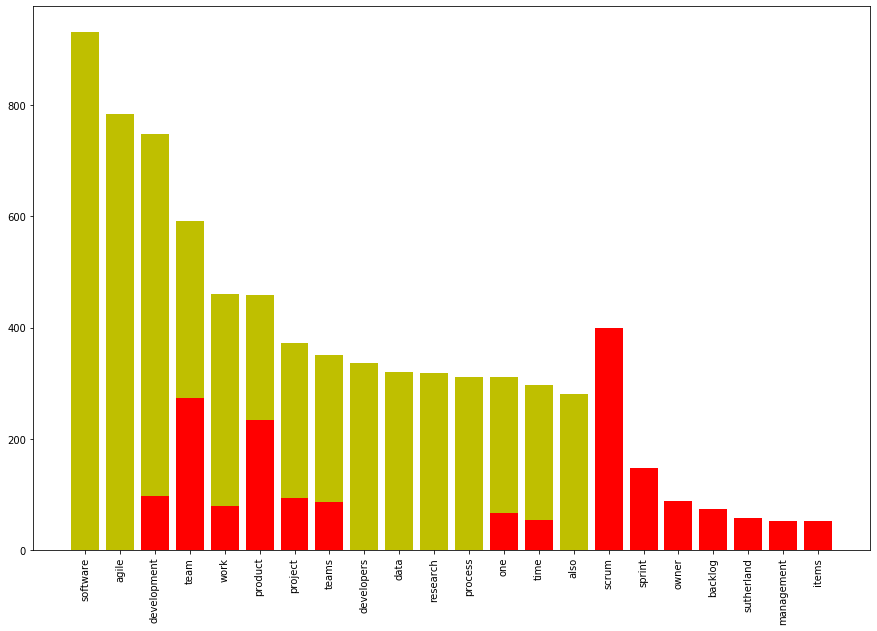

In [9]:
#take the value of the rdd, and take the top 15 information.
file_1_top15 = file_1_uniqueword.map(lambda x: x[1]).take(15)
file_2_top15 = file_2_uniqueword.map(lambda x: x[1]).take(15)
plt.figure(figsize = (15,10))
#plot the bar char and use the rdd's key be the x-axis,  and the rdd's value be the y-axis
plt.bar(file_1_uniqueword.map(lambda x: x[0]).take(15), file_1_top15, label = 'book1', fc = 'y')
plt.bar(file_2_uniqueword.map(lambda x: x[0]).take(15), file_2_top15, label = 'book2', fc = 'r')
plt.xticks(rotation=90)
plt.show()

This chart shows the top 15 common word in book 1 and book 2.
the x-axis is the common word, the y-axis is the number of the word. Book 1 and book 2 have the 8 same most common words. the number of most common words of book 1 is bigger than the most common words of book 2. 